In [42]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

In [22]:
X = pd.read_csv('/Users/paulakoralewska/Downloads/train_data.csv')

In [23]:
y = pd.read_csv('/Users/paulakoralewska/Downloads/train_labels.csv')

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train, y_train)

dummy_clf.predict(X_test)

dummy_clf.score(X, y)

0.8999733262203254

In [47]:
def judge_model(model, name, plot=False):
    print(name)
    print('-'*20)
    
    print('Training Performance')
    print('-> Acc:', accuracy_score(y_train, model.predict(X_train)) )
    print('-> AUC:', roc_auc_score(y_train, model.predict_proba(X_train)[:, 1] ))
    
    print('Testing Performance')
    print('-> Acc:', accuracy_score(y_train, model.predict(X_train)) )
    print('-> AUC:', roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] ))
    print()
    
    if plot:
        fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label='Test')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

Dummy stratified
--------------------
Training Performance
-> Acc: 0.8259419806602201
-> AUC: 0.5062358609748214
Testing Performance
-> Acc: 0.8222740913637879
-> AUC: 0.5017207472959685



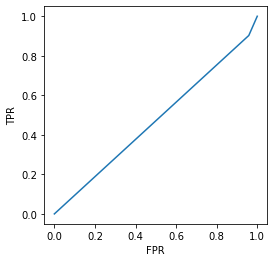

Dummy most_frequent
--------------------
Training Performance
-> Acc: 0.8989663221073692
-> AUC: 0.5
Testing Performance
-> Acc: 0.8989663221073692
-> AUC: 0.5



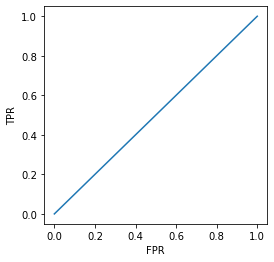

Dummy prior
--------------------
Training Performance
-> Acc: 0.8989663221073692
-> AUC: 0.5
Testing Performance
-> Acc: 0.8989663221073692
-> AUC: 0.5



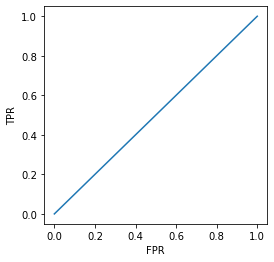

Dummy uniform
--------------------
Training Performance
-> Acc: 0.5005001667222407
-> AUC: 0.5
Testing Performance
-> Acc: 0.4894964988329443
-> AUC: 0.5



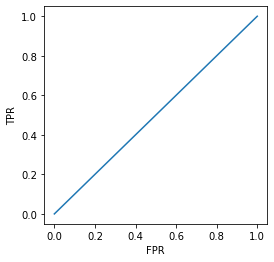

In [48]:
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_clf = DummyClassifier(strategy=strategy)
    dummy_clf.fit(X_train, y_train)
    judge_model(dummy_clf, 'Dummy {}'.format(strategy), plot=True)

In [34]:
dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)

dt_clf.predict(X_test)

dt_clf.score(X, y)

0.989330488130168

In [32]:
cross_val_score(dt_clf, X, y, cv=10)

array([0.93866667, 0.936     , 0.952     , 0.936     , 0.944     ,
       0.93866667, 0.92266667, 0.96      , 0.93066667, 0.94385027])

Decision Tree
--------------------
Training Performance
-> Acc: 1.0
-> AUC: 1.0
Testing Performance
-> Acc: 1.0
-> AUC: 0.8339478859390363



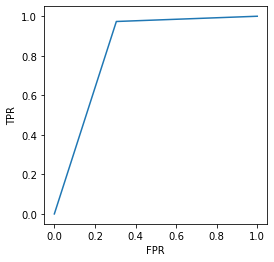

In [49]:
judge_model(dt_clf, 'Decision Tree', plot=True)

In [ ]:
import joblib
joblib.dump(dummy_clf, 'dummy_clf.joblib')
joblib.dump(dt_clf, 'dummy_clf.joblib')